In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

import os
plt.rc("font",family = "Malgun Gothic")
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [84]:
#농수축산물 가격 Data load
df_raw = pd.read_csv("C:/Users/sksya/Downloads/생필품 농수축산물 가격 정보(2019년1월_11월).csv",encoding="CP949")
df_raw.info()
df_raw["품목 이름"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99902 entries, 0 to 99901
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   일련번호               99902 non-null  int64 
 1   시장/마트 번호           99902 non-null  int64 
 2   시장/마트 이름           99902 non-null  object
 3   품목 번호              99902 non-null  int64 
 4   품목 이름              99902 non-null  object
 5   실판매규격              99902 non-null  object
 6   가격(원)              99902 non-null  int64 
 7   년도-월               99902 non-null  object
 8   비고                 65123 non-null  object
 9   시장유형 구분(시장/마트) 코드  99902 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  99902 non-null  object
 11  자치구 코드             99902 non-null  int64 
 12  자치구 이름             99902 non-null  object
 13  점검일자               99902 non-null  object
dtypes: int64(6), object(8)
memory usage: 10.7+ MB


달걀(10개)        5584
달걀(30개)        5544
오이(다다기)        5016
쇠고기(한우,불고기)    4698
배추(2.5~3kg)    4506
               ... 
배(중품),신고          5
오징어(냉동)           5
명태(생물,국산)         5
명태(냉동,국산)         3
삼겹살               2
Name: 품목 이름, Length: 79, dtype: int64

In [85]:
# data 중 품목명에 "고기"가 포함된 데이터 추출
df = df_raw[df_raw["품목 이름"].str.contains("고기")]
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
8,1480027,56,롯데백화점,278,쇠고기,600g1등급,40800,2019-11,NaN,2,대형마트,140000,중구,2019-11-28
9,1480028,56,롯데백화점,99,돼지고기(생삼겹살),600g,23940,2019-11,NaN,2,대형마트,140000,중구,2019-11-28
10,1480029,56,롯데백화점,138,닭고기(토종닭),1kg,9000,2019-11,NaN,2,대형마트,140000,중구,2019-11-28
25,1480044,1,통인시장,58,"쇠고기(한우,불고기)",600g2등급,23000,2019-11,NaN,1,전통시장,110000,종로구,2019-11-28
26,1480045,1,통인시장,99,돼지고기(생삼겹살),600g,13000,2019-11,NaN,1,전통시장,110000,종로구,2019-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99877,1360283,153,이마트명일점,99,돼지고기(생삼겹살),600g,16680,2019-01,100g2780,2,대형마트,740000,강동구,2019-01-31
99878,1360284,153,이마트명일점,275,닭고기(중간),1마리(1.5kg),10170,2019-01,1kg하림6780,2,대형마트,740000,강동구,2019-01-31
99893,1360299,151,암사종합시장,58,"쇠고기(한우,불고기)",600g 1등급,23800,2019-01,NaN,1,전통시장,740000,강동구,2019-01-31
99894,1360300,151,암사종합시장,52,돼지고기(삼겹살),600g,9800,2019-01,NaN,1,전통시장,740000,강동구,2019-01-31


In [86]:
# 고기 data 중 쇠고기/돼지고기/닭고기 구분
df_cow = df[df["품목 이름"].str.contains("쇠고기")]
df_pig = df[df["품목 이름"].str.contains("돼지고기")]
df_chic = df[df["품목 이름"].str.contains("닭고기")]

In [87]:
# 각 고기 data 중 "일련번호","시장/마트 번호","품목 번호","시장유형 구분(시장/마트) 코드","자치구 코드","점검일자" column 제거
df_cow = df_cow.drop(["일련번호","시장/마트 번호","품목 번호","시장유형 구분(시장/마트) 코드","자치구 코드","점검일자"],axis=1)
df_pig = df_pig.drop(["일련번호","시장/마트 번호","품목 번호","시장유형 구분(시장/마트) 코드","자치구 코드","점검일자"],axis=1)
df_chic = df_chic.drop(["일련번호","시장/마트 번호","품목 번호","시장유형 구분(시장/마트) 코드","자치구 코드","점검일자"],axis=1)

In [88]:
# 각 고기 data 에서 '월'만 구분(연도 동일)
df_cow_month = df_cow["년도-월"].map(lambda x : str(x).split('-')[1])
df_cow["월"] = df_cow_month
df_pig_month = df_pig["년도-월"].map(lambda x : str(x).split('-')[1])
df_pig["월"] = df_pig_month
df_chic_month = df_chic["년도-월"].map(lambda x : str(x).split('-')[1])
df_chic["월"] = df_chic_month

In [89]:
# 쇠고기 중 품목 이름이 "쇠고기"로 육종이 불분명한 data index를 list 로 생성
df_cow_drop = df_cow[df_cow["품목 이름"] == "쇠고기"].index.tolist()


In [90]:
# 품목이름이 '쇠고기' 인 data drop
df_cow = df_cow.drop(index=df_cow_drop)

Text(0.5, 1, '쇠고기 품목별 기간에 따른 가격 추이(19년 1월 ~ 11월)')

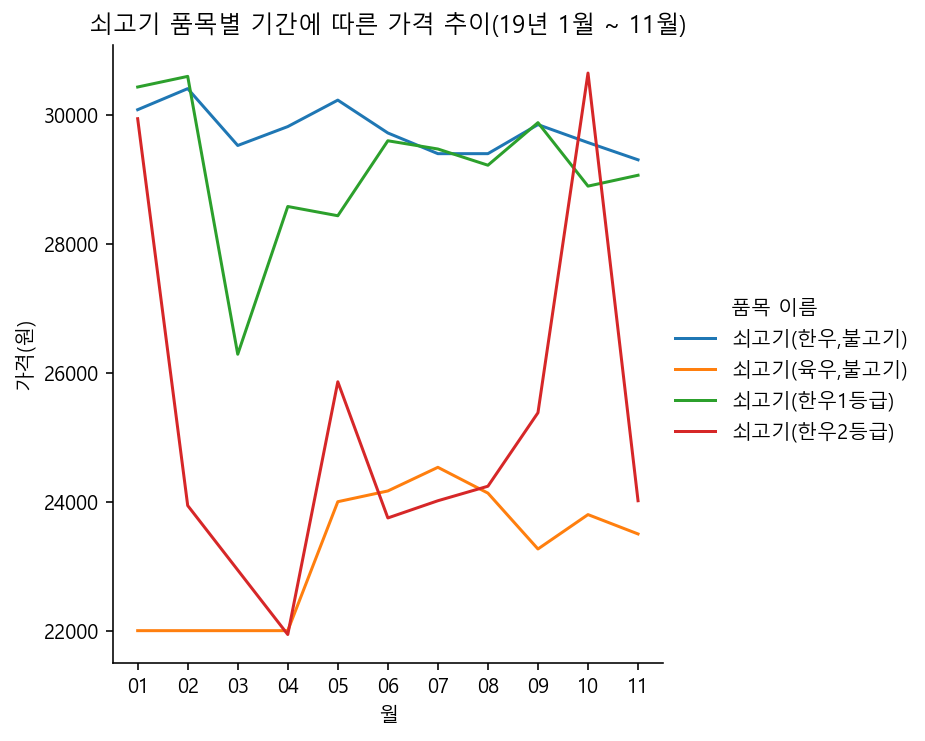

In [92]:
# 품목이름별 기간에 따른 가격 추이 그래프 작성
sns.relplot(data=df_cow,x="월",y="가격(원)",hue="품목 이름",kind="line",ci=None)
plt.title("쇠고기 품목별 기간에 따른 가격 추이(19년 1월 ~ 11월)")